In [1]:
import numpy as np
from scipy import stats
from scipy import signal
import math
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from fly2p_function_TQ.imaging_2p_fixed_heading_period_analysis import find_stop_period_on_heading,PVA_during_stopPeriod,forwrad_speed_during_stopPeriod,bump_amplitude_during_stopPeriod

In [3]:
volume_cycle = 2999
volume_time = 0.10003
volume_rate = 1/volume_time
time_array_imaging = np.arange(volume_cycle)/volume_rate

In [4]:
#Read the imaging/behavior data after preprocessing
pd_imaging_behavior_preprocessed = pd.read_csv('/home/tianhaoqiu/Documents/GitHub/2p_analysis/preprocessing_output/normalized/TQfly004-001-imaging-normalized.csv')
pd_imaging_behavior_preprocessed

,dFF_Roi_1,dFF_Roi_2,dFF_Roi_3,dFF_Roi_4,dFF_Roi_5,dFF_Roi_6,dFF_Roi_7,dFF_Roi_8,PVA_Radian,PVA_Radian_offset,PVA_Angle,Angular_Velocity,Bar_Position/Heading,Unwrapped_Bar_Position/Heading,Unwrapped_Radian,Integrated_x,Integrated_y,PVA_strength,Bump_amplitude
0,0.318296,0.176660,0.446762,0.728133,0.621652,0.515969,0.342748,0.000000,-3.092791,1.190394,-177.203867,-0.024433,2.503203,2.503203,1.190394,-2.301003,2.105588,1.123963,0.728133
1,0.528040,0.527628,0.633153,0.897626,0.728303,0.672284,0.342748,0.356632,2.839769,0.839769,162.706777,0.016393,2.500759,2.500759,0.839769,-2.298714,2.103589,0.891627,0.554878
2,0.530528,0.543850,0.678334,0.938848,0.700746,0.784014,0.363960,0.474742,2.918585,0.918585,167.222575,-0.000113,2.506482,2.506482,0.918585,-2.295527,2.106148,0.818521,0.574888
3,0.549897,0.910178,0.744167,0.962268,0.707182,0.888762,0.520095,0.725761,2.614105,0.614105,149.777195,0.003758,2.500736,2.500736,0.614105,-2.299295,2.104553,0.510799,0.442173
4,0.521979,0.936855,0.724188,0.943830,0.691302,0.722333,0.871922,0.725761,2.790317,0.790317,159.873373,0.038588,2.507234,2.507234,0.790317,-2.296554,2.107832,0.233536,0.421852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,0.338022,0.978823,2.078076,0.801364,1.016459,0.841510,0.474291,0.498547,2.357195,0.357195,135.057324,-0.038174,-2.598188,-2.598188,6.640380,-1.808049,2.503561,2.073646,1.740054
2995,0.447224,0.999449,2.104200,0.895044,0.987726,0.803415,0.384766,0.599866,2.250763,0.250763,128.959247,-0.000982,-2.594007,-2.594007,6.533949,-1.802706,2.508239,2.155087,1.719434
2996,0.528559,1.188202,2.147747,0.898946,0.942987,0.887818,0.384766,0.325123,2.213406,0.213406,126.818833,0.009233,-2.598385,-2.598385,6.496591,-1.794035,2.511734,2.457482,1.822624
2997,0.447224,1.079520,2.115845,0.913151,0.909915,0.869092,0.384766,0.315475,2.273087,0.273087,130.238317,0.016521,-2.592160,-2.592160,6.556273,-1.793223,2.514553,2.417424,1.800369


In [5]:
PVA_Unwrapped_Radian = pd_imaging_behavior_preprocessed['Unwrapped_Radian']
PVA_Angle = pd_imaging_behavior_preprocessed['PVA_Angle']
Angular_velocity = pd_imaging_behavior_preprocessed['Angular_Velocity']
integrated_x = pd_imaging_behavior_preprocessed['Integrated_x']
PVA_strength = pd_imaging_behavior_preprocessed['PVA_strength']
Bump_amplitude = pd_imaging_behavior_preprocessed['Bump_amplitude']
Unwrapped_heading = pd_imaging_behavior_preprocessed['Unwrapped_Bar_Position/Heading']

In [6]:
PVA_Unwrapped_Radian_no_series = np.zeros(len(pd_imaging_behavior_preprocessed['Unwrapped_Radian']))
PVA_Angle_no_series = np.zeros(len(pd_imaging_behavior_preprocessed['Unwrapped_Radian']))
Angular_velocity_no_series = np.zeros(len(pd_imaging_behavior_preprocessed['Unwrapped_Radian']))
integrated_x_no_series = np.zeros(len(pd_imaging_behavior_preprocessed['Unwrapped_Radian']))
PVA_strength_no_series = np.zeros(len(pd_imaging_behavior_preprocessed['Unwrapped_Radian']))
Bump_amplitude_no_series = np.zeros(len(pd_imaging_behavior_preprocessed['Unwrapped_Radian']))
Unwrapped_heading_no_series = np.zeros(len(pd_imaging_behavior_preprocessed['Unwrapped_Radian']))
for i in range(len(pd_imaging_behavior_preprocessed['Unwrapped_Radian'])):
    PVA_Unwrapped_Radian_no_series[i] = pd_imaging_behavior_preprocessed['Unwrapped_Radian'][i]
    PVA_Angle[i] = pd_imaging_behavior_preprocessed['PVA_Angle'][i]
    PVA_Angle_no_series[i] = pd_imaging_behavior_preprocessed['PVA_Angle'][i]
    Angular_velocity_no_series[i] = pd_imaging_behavior_preprocessed['Angular_Velocity'][i]
    integrated_x_no_series[i] = pd_imaging_behavior_preprocessed['Integrated_x'][i]
    PVA_strength_no_series[i] = pd_imaging_behavior_preprocessed['PVA_strength'][i]
    Bump_amplitude_no_series[i] = pd_imaging_behavior_preprocessed['Bump_amplitude'][i]
    Unwrapped_heading_no_series[i] = pd_imaging_behavior_preprocessed['Unwrapped_Bar_Position/Heading'][i]


In [7]:
Forward_velocity = np.gradient(integrated_x)/volume_time
Forward_speed_radian = np.abs(Forward_velocity)
Forward_speed_degrees =Forward_speed_radian * 180/np.pi

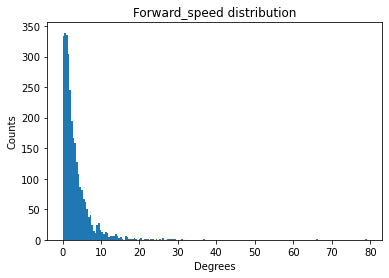

In [8]:
plt.hist(Forward_speed_degrees ,bins='auto')
plt.title('Forward_speed distribution')
plt.xlabel('Degrees')
plt.ylabel('Counts')
plt.show()

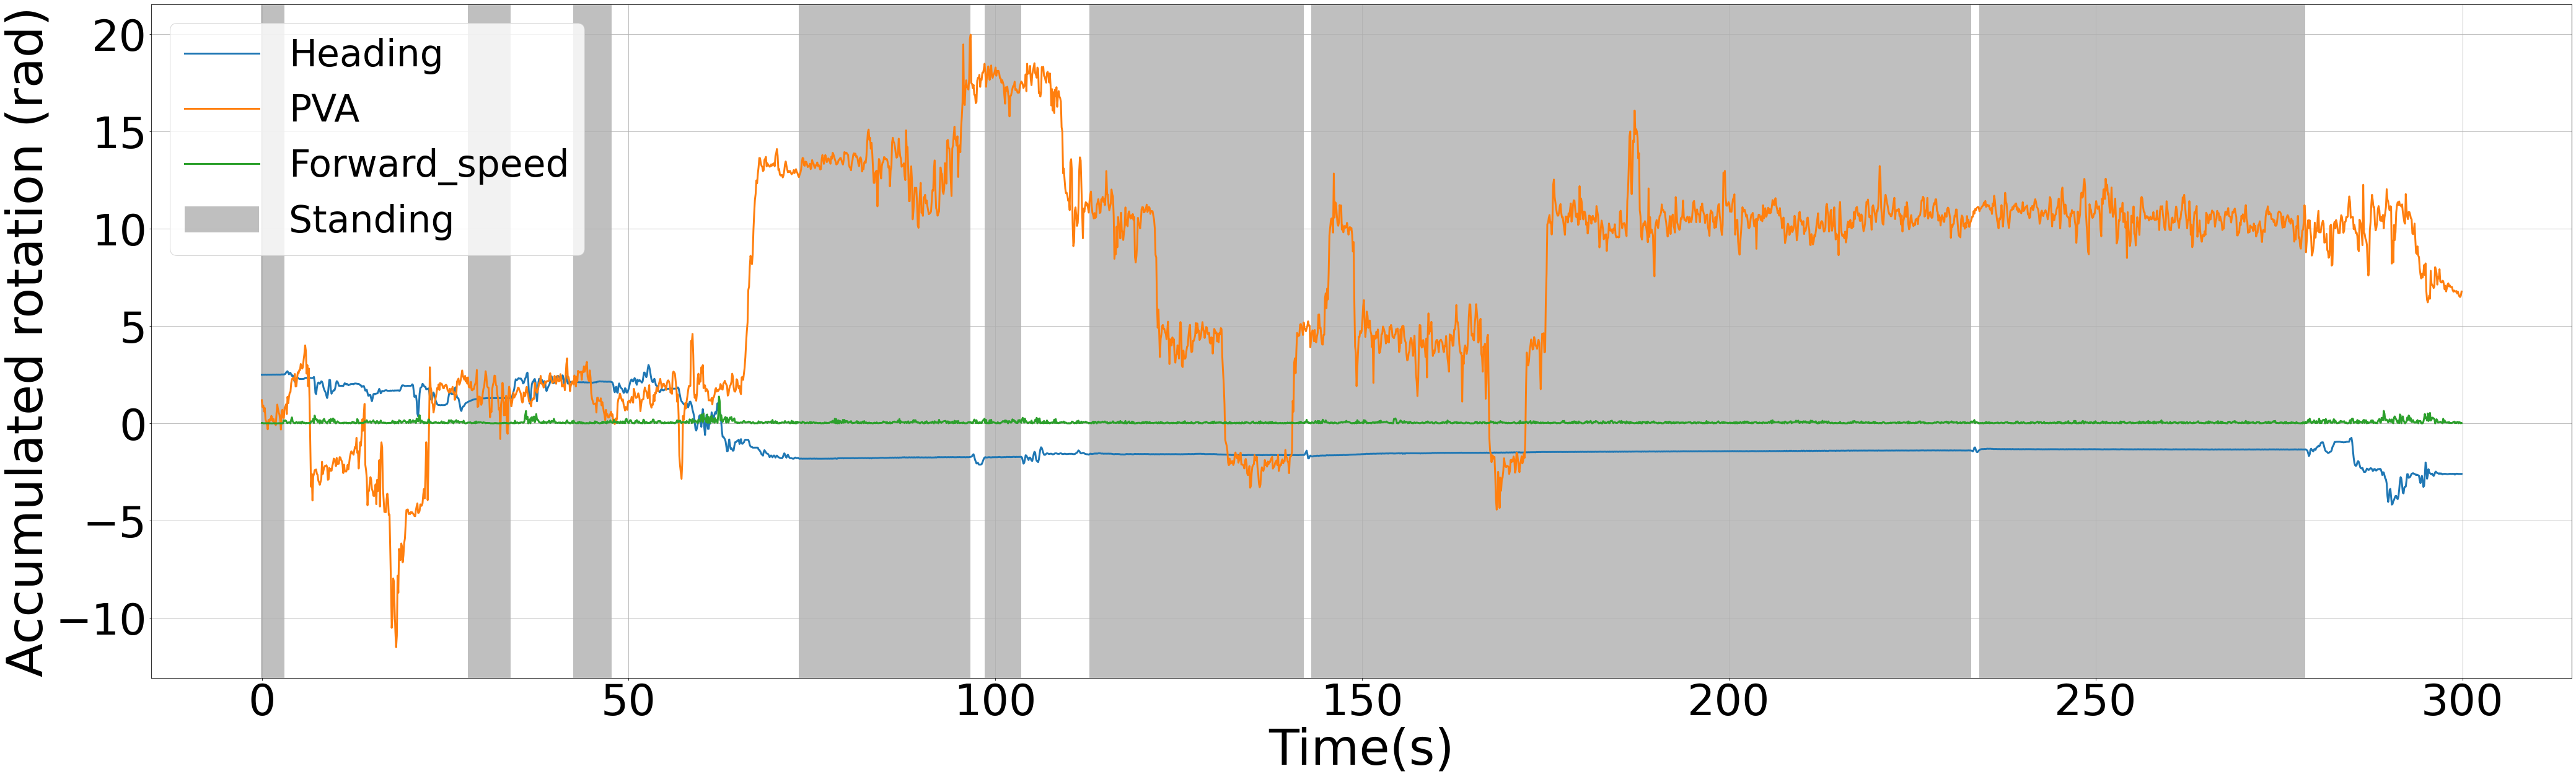

In [9]:
#find stop period and plot as shaded under wrapped PVA/behavior
persistence_stop_index_and_length = find_stop_period_on_heading(head_velocity_array = Angular_velocity,degree_of_tolerance =10,shortest_stopFrame=25)
plt.figure(figsize= (70,20))
plt.plot(time_array_imaging,Unwrapped_heading ,linewidth =3)
plt.plot(time_array_imaging, PVA_Unwrapped_Radian,linewidth =3)
plt.plot(time_array_imaging, Forward_speed_radian,linewidth =3)
plt.xlabel('Time(s)', fontsize=80)
plt.ylabel('Accumulated rotation (rad)', fontsize=80)

#Plot calculated standing period under shaded area
for i in range(len(persistence_stop_index_and_length)):
    plt.axvspan((persistence_stop_index_and_length[i,0]-persistence_stop_index_and_length[i,1])*volume_time, persistence_stop_index_and_length[i,0]*volume_time, color = 'grey', alpha = 0.5, lw =0,label = 'Standing')
plt.legend(['Heading','PVA','Forward_speed','Standing'],fontsize=60)
plt.xticks(fontsize=70)
plt.yticks(fontsize=70)
plt.grid()
plt.show()

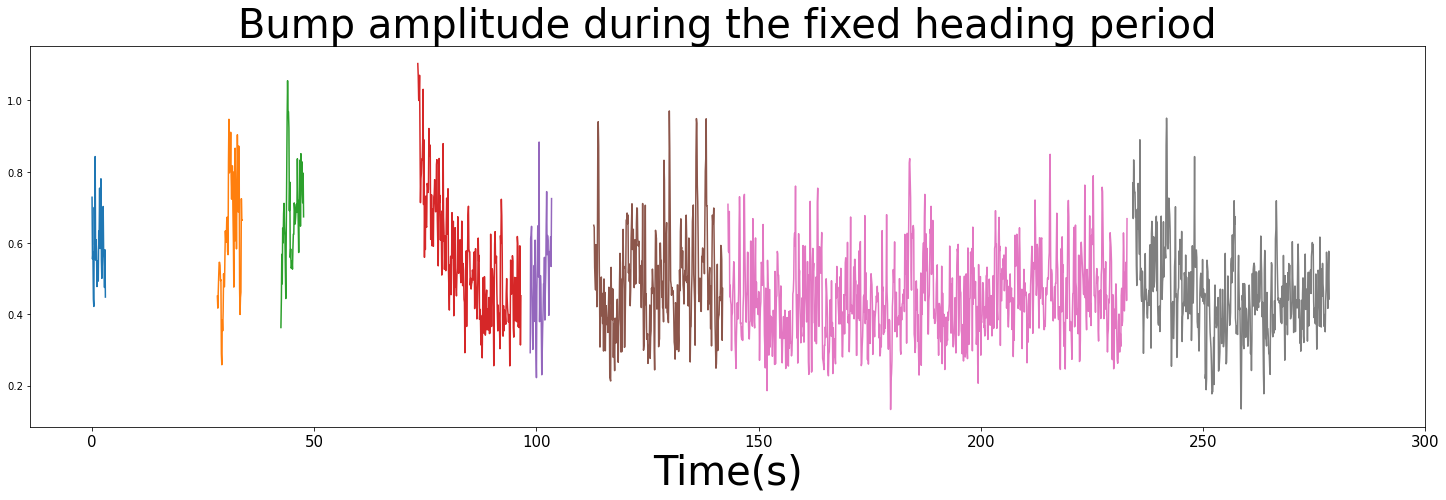

In [10]:
#Check bump amplitude during the time of fixed-heading period
plt.figure(figsize= (25,7))
for i in range(len(persistence_stop_index_and_length)):
    plt.plot(Bump_amplitude[persistence_stop_index_and_length[i,0]-persistence_stop_index_and_length[i,1]+1:persistence_stop_index_and_length[i,0]])
plt.title('Bump amplitude during the fixed heading period', fontsize =40)
plt.xticks(ticks=plt.xticks()[0][1:], labels=np.array(plt.xticks()[0][1:]/volume_rate, dtype=np.int64), fontsize=15)
plt.xlabel('Time(s)', fontsize=40)
plt.show()

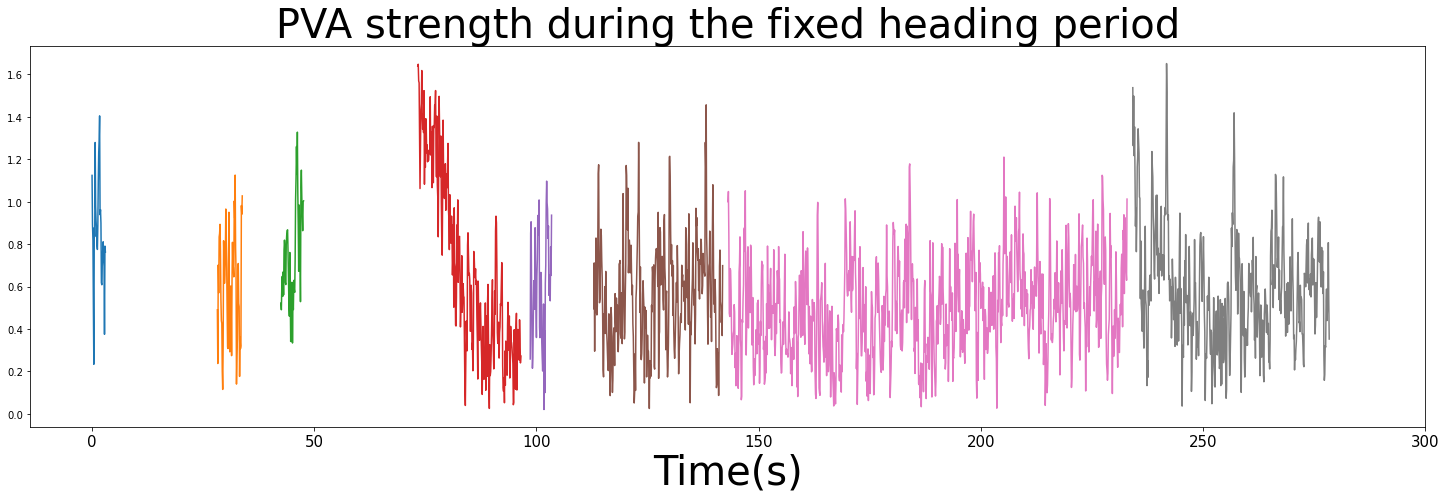

In [11]:
#Check PVA strength during the time of fixed-heading period
plt.figure(figsize= (25,7))
for i in range(len(persistence_stop_index_and_length)):
    plt.plot(PVA_strength[persistence_stop_index_and_length[i,0]-persistence_stop_index_and_length[i,1]+1:persistence_stop_index_and_length[i,0]])
plt.xticks(ticks=plt.xticks()[0][1:], labels=np.array(plt.xticks()[0][1:]/volume_rate, dtype=np.int64), fontsize=15)
plt.title('PVA strength during the fixed heading period', fontsize =40)
plt.xlabel('Time(s)', fontsize=40)
plt.show()
    

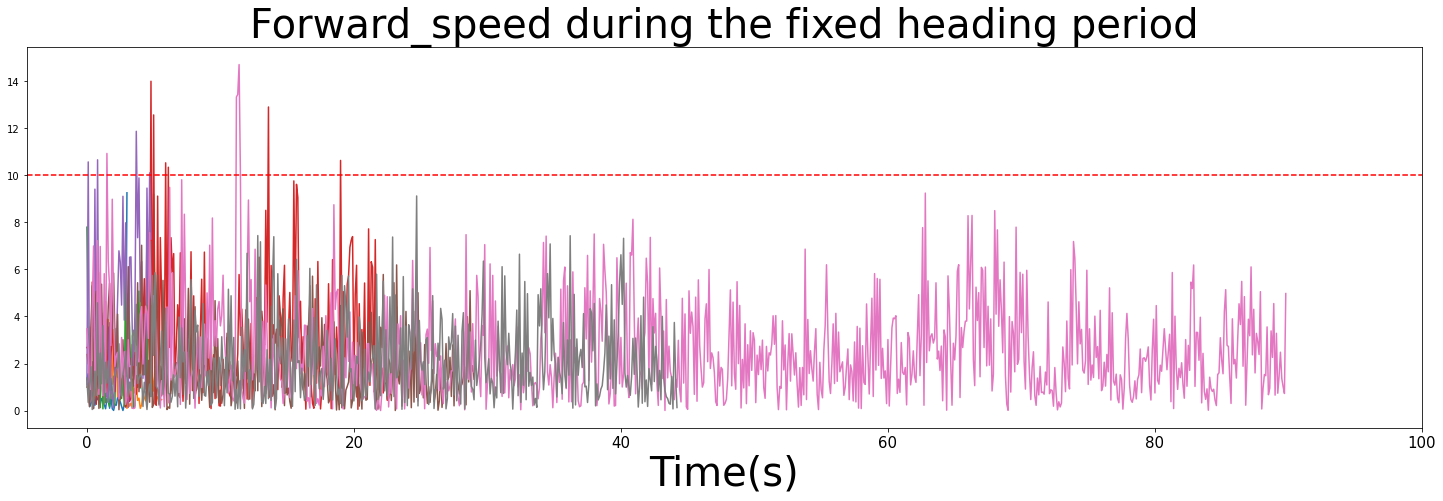

In [12]:
plt.figure(figsize= (25,7))
for i in range(len(persistence_stop_index_and_length)):
    plt.plot(Forward_speed_degrees[persistence_stop_index_and_length[i,0]-persistence_stop_index_and_length[i,1]+1:persistence_stop_index_and_length[i,0]])
plt.xticks(ticks=plt.xticks()[0][1:], labels=np.array(plt.xticks()[0][1:]/volume_rate, dtype=np.int64), fontsize=15)
plt.title('Forward_speed during the fixed heading period', fontsize =40)
plt.axhline(y= 10, color = 'r',linestyle ='--')
plt.xlabel('Time(s)', fontsize=40)
plt.show()
    

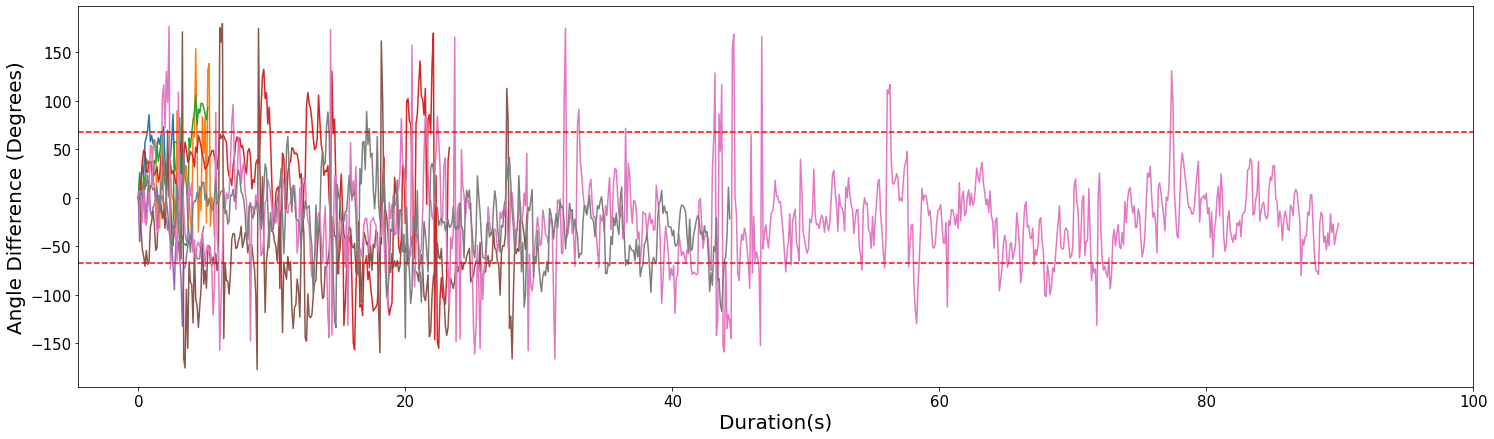

In [13]:
#Calculate annd plot difference throughout the stop period
difference_during_stop = []
current_difference_during_stop = []
current_forward_speed_during_stop = []
forward_speed_during_stop =[]
plt.figure(figsize= (25,7))
for current_index in range(len(persistence_stop_index_and_length)):
    current_stop_PVA = PVA_Angle_no_series[persistence_stop_index_and_length[current_index,0]-persistence_stop_index_and_length[current_index,1]+1]
    current_stop_start_index = persistence_stop_index_and_length[current_index,0]-persistence_stop_index_and_length[current_index,1]+1
    current_difference_during_stop = PVA_Angle_no_series[current_stop_start_index:persistence_stop_index_and_length[current_index,0]+1] - current_stop_PVA
    current_forward_speed_during_stop = Forward_speed_degrees[current_stop_start_index:persistence_stop_index_and_length[current_index,0]+1]
    #Modify the value so angle difference will never be different more than 180 degrees
    for j in range(len(current_difference_during_stop)):
        if np.abs(current_difference_during_stop[j]) > 180:
            if current_difference_during_stop[j] < 0:
                current_difference_during_stop[j] = 360 + current_difference_during_stop[j]
            else:
                current_difference_during_stop[j] = 360 - current_difference_during_stop[j]
    
    difference_during_stop.append(current_difference_during_stop)
    forward_speed_during_stop.append(current_forward_speed_during_stop)
    plt.plot(current_difference_during_stop)

max_length = 0
for i in range(len(difference_during_stop)):
    if max_length < len(difference_during_stop[i]):
        max_length = len(difference_during_stop[i])

time_array_PVA_difference_stop = np.arange(max_length)/volume_rate
plt.axhline(y= 67.5, color = 'r',linestyle ='--')
plt.axhline(y= -67.5, color = 'r',linestyle ='--')
plt.ylabel('Angle Difference (Degrees)', fontsize=20)
plt.xlabel('Duration(s)',fontsize =20)
plt.xticks(ticks=plt.xticks()[0][1:], labels=np.array(plt.xticks()[0][1:]/volume_rate, dtype=np.int64), fontsize=15)
plt.yticks(fontsize=15)
plt.show()
    

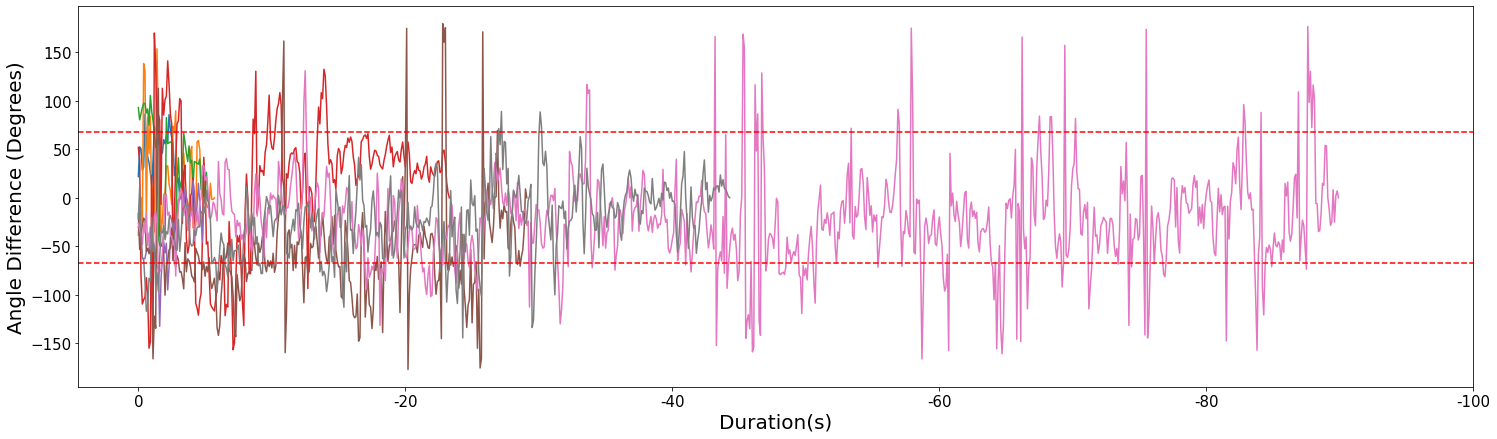

In [14]:
#Plot the reverse of difference during fixed heading period (align at the restart)
plt.figure(figsize= (25,7))
for i in range(len(difference_during_stop)):
    plt.plot(np.flip(difference_during_stop[i]))
             
max_length = 0
for i in range(len(difference_during_stop)):
    if max_length < len(difference_during_stop[i]):
        max_length = len(difference_during_stop[i])

time_array_PVA_difference_stop = np.arange(max_length)/volume_rate
plt.axhline(y= 67.5, color = 'r',linestyle ='--')
plt.axhline(y= -67.5, color = 'r',linestyle ='--')
plt.ylabel('Angle Difference (Degrees)', fontsize=20)
plt.xlabel('Duration(s)',fontsize =20)
plt.xticks(ticks=plt.xticks()[0][1:], labels=np.array(plt.xticks()[0][1:]/-volume_rate, dtype=np.int64), fontsize=15)
plt.yticks(fontsize=15)
plt.show()

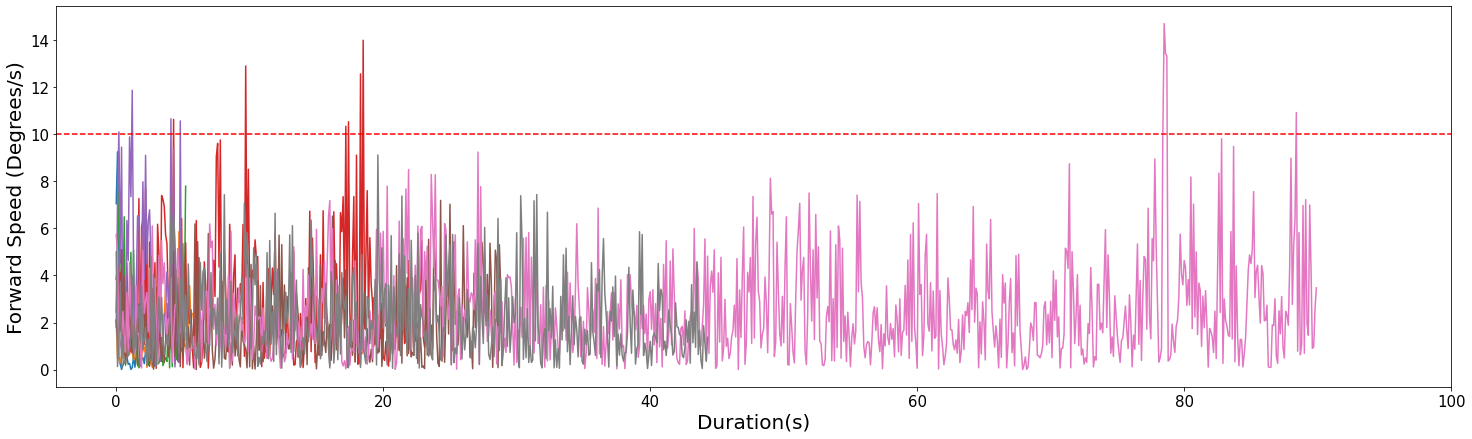

In [15]:
#plot foward speed during the stop
plt.figure(figsize= (25,7))
for i in range(len(forward_speed_during_stop)):
    plt.plot(np.flip(forward_speed_during_stop[i]))

max_length = 0
for i in range(len(forward_speed_during_stop)):
    if max_length < len(forward_speed_during_stop[i]):
        max_length = len(forward_speed_during_stop[i])

time_array_PVA_difference_stop = np.arange(max_length)/volume_rate
plt.axhline(y= 10, color = 'r',linestyle ='--')
plt.ylabel('Forward Speed (Degrees/s)', fontsize=20)
plt.xlabel('Duration(s)',fontsize =20)
plt.xticks(ticks=plt.xticks()[0][1:], labels=np.array(plt.xticks()[0][1:]/volume_rate, dtype=np.int64), fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [16]:
PVA_angle_at_stop = PVA_during_stopPeriod(stop_index_array = persistence_stop_index_and_length, PVA_array =PVA_Angle_no_series, volume_time=volume_time)
PVA_angle_at_stop.insert(0,'FlyTrial','TQfly004-001')
PVA_angle_at_stop.insert(1,'Genotype','R60D05>GCaMP7f')
PVA_angle_at_stop.insert(2,'TrialType','dark')
PVA_angle_at_stop

,FlyTrial,Genotype,TrialType,Period_duration,PVA_before_stop,PVA_at_restart,PVA_100ms_before_restart,PVA_500ms_before_restart,PVA_in_middle,PVA_2s_before_restart,PVA_3s_after_stop,PVA_5s_after_stop,PVA_10s_after_stop
0,TQfly004-001,R60D05>GCaMP7f,dark,3.20096,-177.203867,160.890984,130.306532,150.867759,120.959785,122.847175,132.289668,NaN,NaN
1,TQfly004-001,R60D05>GCaMP7f,dark,5.80174,-137.776123,-176.240416,-146.308401,83.896895,-175.689385,-135.111922,132.532641,176.671524,NaN
2,TQfly004-001,R60D05>GCaMP7f,dark,5.30159,-130.632316,136.354413,148.991969,132.117236,-179.927581,-169.806922,172.621770,136.273813,NaN
3,TQfly004-001,R60D05>GCaMP7f,dark,23.40702,127.297791,179.207700,165.263634,22.248050,177.537233,-147.336441,143.771424,165.723774,-172.195034
4,TQfly004-001,R60D05>GCaMP7f,dark,5.00150,71.171261,41.491006,34.198123,8.191761,38.880823,26.023124,14.267794,41.491006,NaN
5,TQfly004-001,R60D05>GCaMP7f,dark,29.20876,68.320423,51.849127,15.032031,47.393070,20.290953,11.961742,83.406141,-20.635695,44.467809
6,TQfly004-001,R60D05>GCaMP7f,dark,90.02700,21.449243,-4.985524,-11.541791,-5.558440,-55.080835,-9.096417,-43.503407,-30.421006,25.853537
7,TQfly004-001,R60D05>GCaMP7f,dark,44.41332,26.154897,4.599614,37.055979,-37.270502,55.922548,-2.694528,37.424769,42.315117,10.968246


In [17]:
Forward_speed_at_stop = forwrad_speed_during_stopPeriod(stop_index_array=persistence_stop_index_and_length,forward_speed_array=Forward_speed_degrees, volume_time=volume_time)
Forward_speed_at_stop

,forward_speed_before_stop,forward_speed_at_restart,forward_speed_100ms_before_restart,forward_speed_500ms_before_restart,forward_speed_in_middle,forward_speed_2s_before_restart,forward_speed_3s_after_stop,forward_speed_5s_after_stop,forward_speed_10s_after_stop
0,1.311453,7.050723,9.257609,0.003153,0.502647,0.396174,0.523358,NaN,NaN
1,2.380458,2.082350,0.467160,0.584240,1.310828,0.431224,0.628445,1.429006,NaN
2,7.794818,2.442382,4.896114,3.781991,1.207594,1.328823,6.162756,2.563601,NaN
3,2.674436,3.848816,4.390986,2.184880,4.315939,6.090748,0.145740,0.673490,0.211012
4,1.089440,1.792415,7.290560,9.456768,6.791000,4.273649,7.981278,1.792415,NaN
5,0.998457,2.109002,1.334434,5.096711,3.181458,2.261936,1.854512,0.133005,0.332209
6,3.474313,5.739267,4.973379,1.366070,0.156138,0.067747,0.260258,4.503852,4.635907
7,1.376858,5.000503,0.129028,0.069838,2.510056,3.564344,2.532403,5.742551,2.264148


In [18]:
Bump_amplitude_at_stop = bump_amplitude_during_stopPeriod(stop_index_array=persistence_stop_index_and_length,bump_amplitude_array=Bump_amplitude_no_series, volume_time=volume_time)
Bump_amplitude_at_stop

,bump_amplitude_before_stop,bump_amplitude_at_restart,bump_amplitude_100ms_before_restart,bump_amplitude_500ms_before_restart,bump_amplitude_in_middle,bump_amplitude_2s_before_restart,bump_amplitude_3s_after_stop,bump_amplitude_5s_after_stop,bump_amplitude_10s_after_stop
0,0.728133,0.410481,0.448162,0.557631,0.633117,0.549819,0.580806,NaN,NaN
1,0.450756,0.560290,0.663682,0.461759,0.816734,0.799917,0.823364,0.852751,NaN
2,0.362716,0.774868,0.673228,0.736228,0.526480,0.670224,0.624463,0.712443,NaN
3,1.103142,0.498224,0.451824,0.591672,0.575047,0.548346,0.610026,0.712828,0.661183
4,0.292152,0.574401,0.724419,0.582052,0.484875,0.485470,0.410047,0.574401,NaN
5,0.649557,0.470304,0.472269,0.585033,0.537182,0.450586,0.391856,0.329081,0.612559
6,0.708357,0.553871,0.668065,0.492944,0.515432,0.400523,0.376420,0.376316,0.345036
7,0.768608,0.544458,0.442740,0.416573,0.540182,0.364050,0.441056,0.492766,0.278937


In [19]:
output_df = pd.concat([PVA_angle_at_stop,Forward_speed_at_stop,Bump_amplitude_at_stop], axis=1)
output_df

,FlyTrial,Genotype,TrialType,Period_duration,PVA_before_stop,PVA_at_restart,PVA_100ms_before_restart,PVA_500ms_before_restart,PVA_in_middle,PVA_2s_before_restart,...,forward_speed_10s_after_stop,bump_amplitude_before_stop,bump_amplitude_at_restart,bump_amplitude_100ms_before_restart,bump_amplitude_500ms_before_restart,bump_amplitude_in_middle,bump_amplitude_2s_before_restart,bump_amplitude_3s_after_stop,bump_amplitude_5s_after_stop,bump_amplitude_10s_after_stop
0,TQfly004-001,R60D05>GCaMP7f,dark,3.20096,-177.203867,160.890984,130.306532,150.867759,120.959785,122.847175,...,NaN,0.728133,0.410481,0.448162,0.557631,0.633117,0.549819,0.580806,NaN,NaN
1,TQfly004-001,R60D05>GCaMP7f,dark,5.80174,-137.776123,-176.240416,-146.308401,83.896895,-175.689385,-135.111922,...,NaN,0.450756,0.560290,0.663682,0.461759,0.816734,0.799917,0.823364,0.852751,NaN
2,TQfly004-001,R60D05>GCaMP7f,dark,5.30159,-130.632316,136.354413,148.991969,132.117236,-179.927581,-169.806922,...,NaN,0.362716,0.774868,0.673228,0.736228,0.526480,0.670224,0.624463,0.712443,NaN
3,TQfly004-001,R60D05>GCaMP7f,dark,23.40702,127.297791,179.207700,165.263634,22.248050,177.537233,-147.336441,...,0.211012,1.103142,0.498224,0.451824,0.591672,0.575047,0.548346,0.610026,0.712828,0.661183
4,TQfly004-001,R60D05>GCaMP7f,dark,5.00150,71.171261,41.491006,34.198123,8.191761,38.880823,26.023124,...,NaN,0.292152,0.574401,0.724419,0.582052,0.484875,0.485470,0.410047,0.574401,NaN
5,TQfly004-001,R60D05>GCaMP7f,dark,29.20876,68.320423,51.849127,15.032031,47.393070,20.290953,11.961742,...,0.332209,0.649557,0.470304,0.472269,0.585033,0.537182,0.450586,0.391856,0.329081,0.612559
6,TQfly004-001,R60D05>GCaMP7f,dark,90.02700,21.449243,-4.985524,-11.541791,-5.558440,-55.080835,-9.096417,...,4.635907,0.708357,0.553871,0.668065,0.492944,0.515432,0.400523,0.376420,0.376316,0.345036
7,TQfly004-001,R60D05>GCaMP7f,dark,44.41332,26.154897,4.599614,37.055979,-37.270502,55.922548,-2.694528,...,2.264148,0.768608,0.544458,0.442740,0.416573,0.540182,0.364050,0.441056,0.492766,0.278937


In [20]:
output_df.to_csv('/home/tianhaoqiu/Documents/GitHub/2p_analysis/fixed_heading_period_data/points_during_stop_period/TQfly004-001-Fixed_Heading_Period.csv',encoding = 'utf-8', index=False)